In [2]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.cross_validation import train_test_split
import numpy as np

# allow plots to appear directly in the notebook
%matplotlib inline

C:\Users\murta\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
df_full = pd.read_csv('Fifa2017.csv')

In [4]:
df_full.drop(['National_Position','National_Kit','Club_Joining','Contract_Expiry'], axis =1, inplace=True)

In [5]:
df_full.dropna(axis = 0, how='any', inplace=True)

In [6]:
df = df_full[['Rating','Ball_Control', 'Dribbling', 'Reactions', 'Composure',
                       'Acceleration', 'Speed','Strength', 'Balance',
                       'Jumping', 'Heading', 'Shot_Power', 'Finishing']].copy()

df = df.sample(n=3000)

# Feature of the subset
Rating = Overall ability of a player
all other values contribute to the rating of a player

In [7]:
df.shape

(3000, 13)

#### There are 3000 players, and 12 abilities which will be used to predict the rating of a player

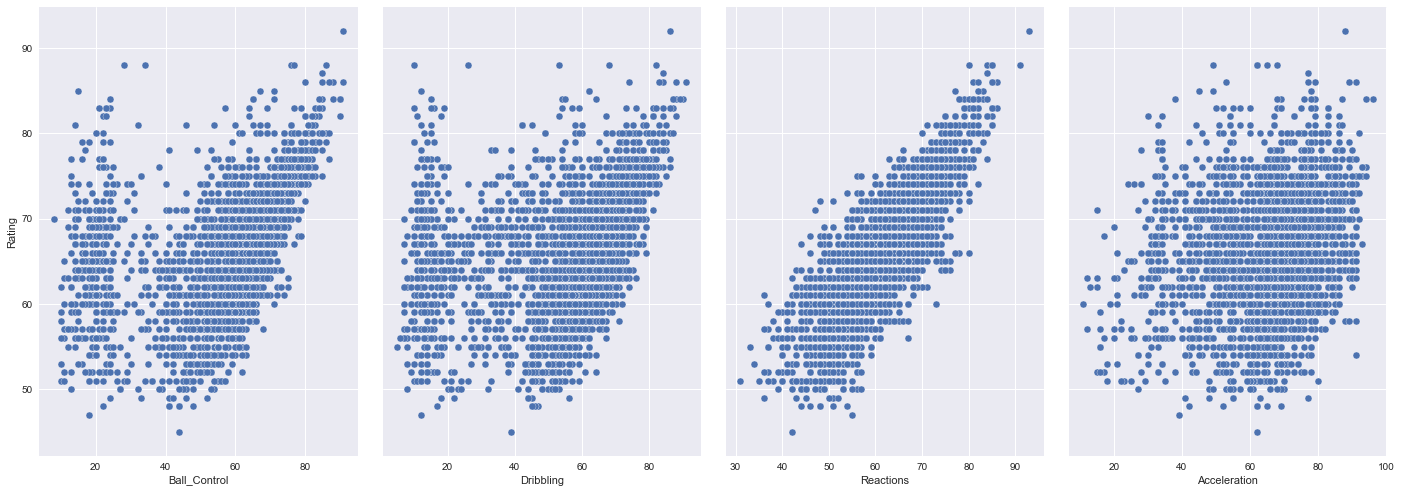

In [8]:
sns.pairplot(df, x_vars = ['Ball_Control', 'Dribbling','Reactions','Acceleration'], y_vars = ['Rating'], size=7, aspect=0.7)

In [9]:
lm1 = smf.ols(formula='Rating ~ Ball_Control', data = df).fit()

In [10]:
lm1.params

Intercept       55.654742
Ball_Control     0.181250
dtype: float64

In [11]:
feature = ['Ball_Control']
X = df[feature]
y = df.Rating

lm2 = LinearRegression()
lm2.fit(X,y)

print (lm2.intercept_)
print (lm2.coef_)

55.6547424888
[ 0.18124995]


# This basically means if I increase my overall rating by 10 points my  ball control should increase by 1.938 points

#### Also note if the coefficient value were to be negative the relation would be inverse

In [12]:
# manually calculate the prediction
54.6833439656 + 0.19388908*90  
# WE consider a player with ball controll = 90 and predict his rating to be 72.133

72.13336116560001

In [13]:
lm2.predict(90)

array([ 71.96723793])

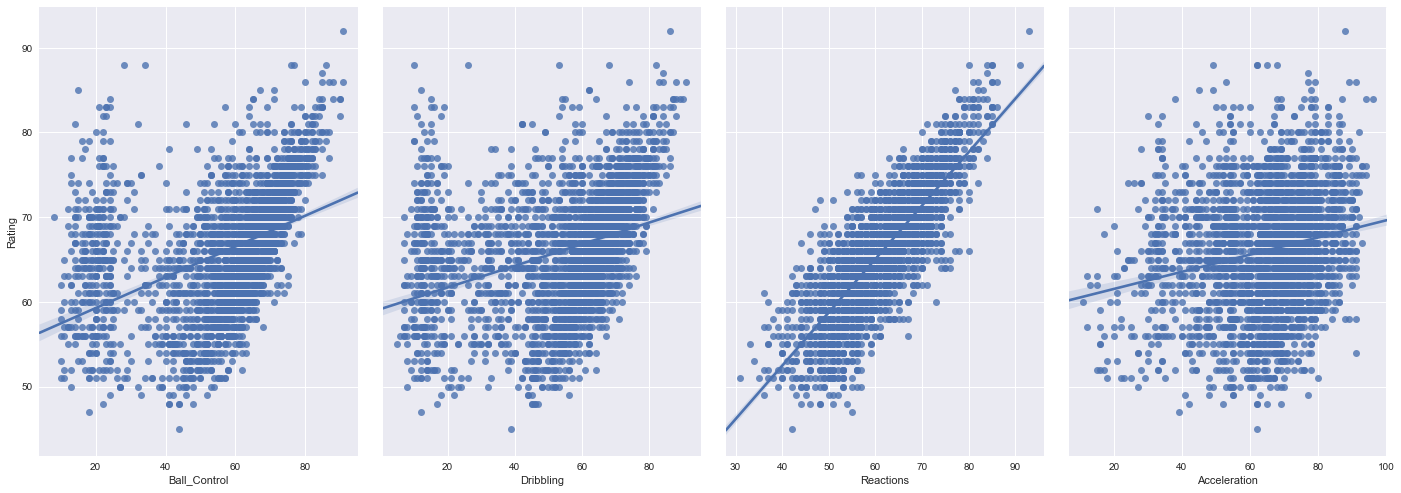

In [14]:
sns.pairplot(df, x_vars = ['Ball_Control', 'Dribbling','Reactions','Acceleration'], y_vars = ['Rating'], size=7, aspect=0.7, kind = 'reg')

In [15]:
lm1.conf_int()  
# concept not yet cleared

,0,1
Intercept,54.857123,56.452362
Ball_Control,0.167923,0.194577


## Pvalue shows relationship between two variables, ideally should be less than 0.05 as this would mean 5 values out of 100 insignificant values will be considered significant

In [16]:
lm1.pvalues

Intercept        0.000000e+00
Ball_Control    8.948408e-141
dtype: float64

#### RSquare explains variance in the data,
Getting a higher value means we are able to explain more points in our data 

In [17]:
lm1.rsquared

0.19172618395701113

In [18]:
lm2.score(X,y)

0.19172618395701113

## Such a poor Rsquare was expected as we can see the regression line is barely able to give justice to each point

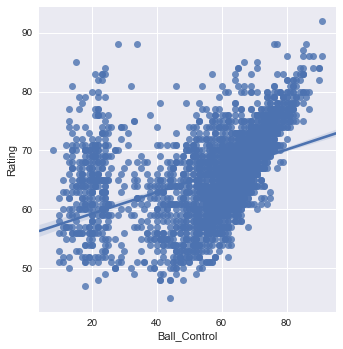

In [19]:
sns.pairplot(df, x_vars=['Ball_Control'], y_vars=['Rating'], kind = 'reg', size = 5)

In [20]:
feature = ['Dribbling']
X = df[feature]
y = df.Rating

lm_dribbling = LinearRegression()
lm_dribbling.fit(X,y)

print (lm_dribbling.intercept_)
print (lm_dribbling.coef_)

59.1435347894
[ 0.12783412]


In [21]:
lm_dribbling.score(X,y)

0.12216803924369957

In [22]:
lm_dribbling.predict(90)

array([ 70.64860584])

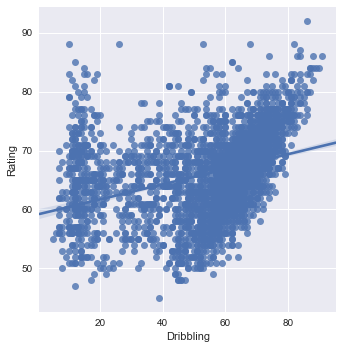

In [23]:
sns.pairplot(df, x_vars=['Dribbling'], y_vars=['Rating'], kind = 'reg', size = 5)

In [24]:
feature = ['Reactions']
X = df[feature]
y = df.Rating

lm_reaction = LinearRegression()
lm_reaction.fit(X,y)

print (lm_reaction.intercept_)
print (lm_reaction.coef_)

27.241240642
[ 0.63064902]


In [25]:
lm_reaction.score(X,y)

0.67708826527909327

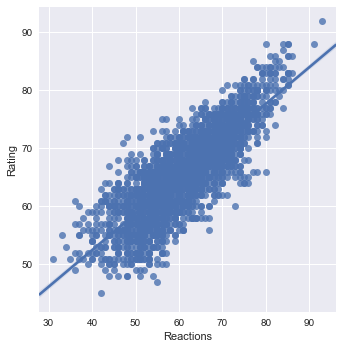

In [26]:
sns.pairplot(df, x_vars = 'Reactions', y_vars = 'Rating', kind = 'reg', size = 5)

In [27]:
### STATSMODELS ###

# create a fitted model with all three features
lm_stats_all = smf.ols(formula='Rating ~ Ball_Control + Acceleration + Reactions + Dribbling', data=df).fit()

# print the coefficients
lm_stats_all.params

Intercept       26.479632
Ball_Control     0.145453
Acceleration     0.000238
Reactions        0.583685
Dribbling       -0.087112
dtype: float64

In [28]:
### SCIKIT-LEARN ###

# create X and y
feature_cols = ['Ball_Control','Acceleration','Reactions', 'Dribbling']
X = df[feature_cols]
y = df.Rating

# instantiate and fit
lm_sk_all = LinearRegression()
lm_sk_all.fit(X, y)

# print the coefficients
print (lm_sk_all.intercept_)
print (lm_sk_all.coef_)
lm_sk_all.score(X,y)

26.4796316766
[  1.45452755e-01   2.37781979e-04   5.83685141e-01  -8.71118957e-02]


0.69737921616854481

In [29]:
lm_stats_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     1725.
Date:                Fri, 17 Nov 2017   Prob (F-statistic):               0.00
Time:                        01:30:29   Log-Likelihood:                -8304.1
No. Observations:                3000   AIC:                         1.662e+04
Df Residuals:                    2995   BIC:                         1.665e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       26.4796      0.567     46.730      0.000      25.369      27.591
Ball_Control     0.1455      0.012     12.123      0.000       0.122       0.169
Acceleration     0.0002      0.007      0.032      0.974      -0.014       0.015
Reactions        0.5837      0.009     68.528      0.000       0.567       0.600
Dribbling       -0.0871      0.011     -7.681      0.000      -0.109      -0.065
==============================================================================
Omnibus:                        9.618   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               11.198
Skew:                          -0.064   Prob(JB):                      0.00370
Kurtosis:                       3.270   Cond. No.                         980.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Remove acceleration Coz p value is significantly greater than 0.05   
  
## And Rsquare is significantly greater which means this model is better than previous ones



# Cross Validation 

In [30]:
X = df[['Ball_Control','Reactions', 'Dribbling']]
y = df.Rating
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
lm_cval = LinearRegression()
lm_cval.fit(X_train, y_train)
y_pred = lm_cval.predict(X_test)
print (np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

3.79610920133


In [31]:
y_pred

array([ 62.86522927,  63.05298972,  67.21861657,  69.08460961,
        58.49071963,  68.98354818,  76.53047326,  58.95027415,
        61.07551648,  59.0984353 ,  69.69897792,  65.40557176,
        70.44700587,  69.34678905,  67.66817619,  59.80644006,
        70.05704712,  61.17662153,  67.99555206,  71.96823501,
        71.85530565,  62.13384886,  70.36555396,  63.13554235,
        66.00286864,  56.81136629,  67.61744945,  61.88870902,
        66.38948515,  53.70333132,  59.63201674,  70.86396728,
        57.92524864,  69.27016037,  72.68996896,  59.37317955,
        71.89047378,  70.15036697,  64.77085344,  65.11487684,
        67.36231472,  68.67764309,  68.35031085,  56.29626181,
        62.12979796,  62.0386996 ,  75.36214166,  57.434989  ,
        56.35811599,  68.56176355,  60.20453245,  67.04493375,
        76.15758594,  70.18000321,  61.3965563 ,  65.61445454,
        58.43665065,  66.04253161,  61.71762795,  67.75667281,
        67.84442893,  68.91500952,  66.04546175,  68.78

In [32]:
y_test

15819    57
8182     67
7886     67
6084     69
17245    51
3852     72
391      80
14518    60
13991    60
11374    64
2411     74
16070    56
5980     69
7114     68
12147    63
13560    61
7076     68
16783    54
5402     70
4915     70
7583     67
5845     69
3597     72
14265    60
7551     67
16823    53
7294     68
16987    53
12467    63
17041    52
         ..
2473     74
11245    65
8569     67
17108    52
11912    63
15020    59
17383    50
5173     70
7668     67
12613    62
15565    57
442      80
9928     65
14839    59
7257     68
15502    57
14376    60
7027     68
15743    57
13334    61
2425     74
7951     67
6309     69
6557     68
1004     77
5666     69
10779    64
2021     75
1039     77
7057     68
Name: Rating, Length: 750, dtype: int64

In [33]:
X = df[['Ball_Control','Reactions']]
y = df.Rating
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
lm_cval = LinearRegression()
lm_cval.fit(X_train, y_train)
y_pred = lm_cval.predict(X_test)
print (np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

3.82287440451


In [34]:
y_pred

array([ 62.90898965,  62.02414703,  66.89606775,  69.6610343 ,
        59.08459312,  68.80595617,  76.76225368,  59.73069969,
        60.13807021,  58.45634524,  69.37600826,  65.37702436,
        69.95796614,  69.89381746,  67.84505906,  60.07987442,
        70.59811981,  61.163116  ,  68.10165381,  72.1872648 ,
        70.95324744,  62.36736886,  70.09816931,  63.96246674,
        66.48274434,  56.79709867,  67.31534407,  62.37927466,
        66.48869724,  53.91574055,  60.01572573,  70.89505166,
        59.38747786,  69.86538616,  73.06615452,  59.13683601,
        71.71574559,  70.83685587,  64.42803305,  64.72496489,
        67.63013461,  68.42106405,  68.33443697,  55.78991158,
        61.13930441,  61.61677651,  75.88931686,  55.97045184,
        56.45982974,  68.03750512,  60.26041468,  67.07065512,
        76.01166133,  69.89381746,  61.72126229,  64.32950017,
        59.20098469,  63.60138621,  61.6690194 ,  68.25242958,
        68.42106405,  69.42825115,  66.1917654 ,  68.39

In [35]:
y_test

15819    57
8182     67
7886     67
6084     69
17245    51
3852     72
391      80
14518    60
13991    60
11374    64
2411     74
16070    56
5980     69
7114     68
12147    63
13560    61
7076     68
16783    54
5402     70
4915     70
7583     67
5845     69
3597     72
14265    60
7551     67
16823    53
7294     68
16987    53
12467    63
17041    52
         ..
2473     74
11245    65
8569     67
17108    52
11912    63
15020    59
17383    50
5173     70
7668     67
12613    62
15565    57
442      80
9928     65
14839    59
7257     68
15502    57
14376    60
7027     68
15743    57
13334    61
2425     74
7951     67
6309     69
6557     68
1004     77
5666     69
10779    64
2021     75
1039     77
7057     68
Name: Rating, Length: 750, dtype: int64